### Sumário

- Onda viajante e modos ortogonais
- Decomposição com SVD
- Reconstrução com modos ortogonais

In [66]:
import numpy as np
import matplotlib.pyplot as plt

### Onda viajante e modos ortogonais

Vamos analisar a decomposição de um sinal em modos ortogonais com POD (proper orthonal decomposition). Para isso, vamos analisar uma onda viajante descrita pela seguinte função:

$f(x, t) = sin(wt - kx)$

Usando as relações trigonometricas podemos reescrever a função como a combinação de dois modos espaciais ortogonais.

$f(x, t) = sin(wt)cos(-kx) + cos(wt)sin(-kx)$


Os modos são $cos(-kx)$ e $sin(-kx)$


In [600]:
# Traveling wave parameters
freq = 5
w = 2*np.pi*freq
k = 20 # spacial frequency

fs = 1000; # temporal frequency
fs_space = 400
x = np.arange(0, 1.1, 1/fs_space)
t = np.arange(0, 0.5, 1/fs)


In [599]:
x.shape, t.shape, f.shape

((440,), (500,), (440, 500))

In [586]:
tv, xv = np.meshgrid(t, x)

In [587]:
f = np.sin(w*tv - k*xv)

In [588]:
# Orthogonal modes
f_mode1 = np.sin(w*tv)*np.cos(-k*xv)
f_mode2 = np.cos(w*tv)*np.sin(-k*xv)

Podemos verificar se os modos são de fatos ortogonais fazendo o produto escalar entre os modos.

In [589]:
np.max(np.abs(np.dot(f_mode1.T, f_mode2)))

0.0036426775042865955

Podemos visualizar a função f(x, t), seus 2 modos e como a soma desses modos ponderada pela variação temporal reconsitui a função original.

Text(0.5, 1.0, 'f(x, t) - Mode Sum')

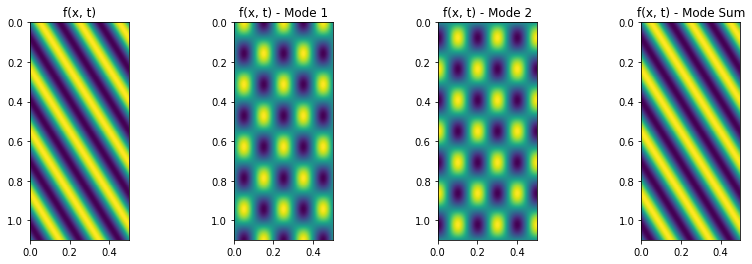

In [590]:
fig, axs = plt.subplots(1, 4, figsize = (14, 4))
axs[0].imshow(f, extent=[min(t), max(t), max(x), min(x)])
axs[0].set_title("f(x, t)")
axs[1].imshow(f_mode1, extent=[min(t), max(t), max(x), min(x)])
axs[1].set_title("f(x, t) - Mode 1")
axs[2].imshow(f_mode2, extent=[min(t), max(t), max(x), min(x)])
axs[2].set_title("f(x, t) - Mode 2")
axs[3].imshow(f_mode1 + f_mode2, extent=[min(t), max(t), max(x), min(x)])
axs[3].set_title("f(x, t) - Mode Sum")

### Decomposição com SVD

Podemos recuperar os modos a partir dos dados com POD, para isso decompomos a matriz $f$ em modos singulars com SVD.

In [591]:
[u, s, v] = np.linalg.svd(f, full_matrices=False)

A decomposição em valores singulares gera três matrizes $U$, $S$ e $V$. 

Tal que as colunas de $U$ representam uma base para ortogonal para as colunas de $f$ e as linhas de $v$ representam uma base ortogonal para as linhas de $f$.

A matriz $S$ é uma matriz diagonal, na qual os elementos da diagonal representam os valores singulares que podem ser interpretados como a energia $f$ contina nos modos presentes nas colunas e linhas de $U$ e $V$.

Podemos ver que as matrizes $U$ e $V$ são ortogonais calculando o seguinte produto de todas as linhas com todas as colunas e verificando que obtemos uma matriz diagonal (neste caso em particular a matriz identidade).

In [592]:
UU = np.dot(u.T, u)
np.allclose(UU, np.eye(len(UU)))

True

In [593]:
VV = np.dot(v.T, v)
np.allclose(UU, np.eye(len(UU)))

True

Porém para representarmos a função $f$, podemos manter somente os modos espaciais (colunas de $U$) com energia significativa. Isso pode ser medido pela amplitudo dos elementos de $s$.

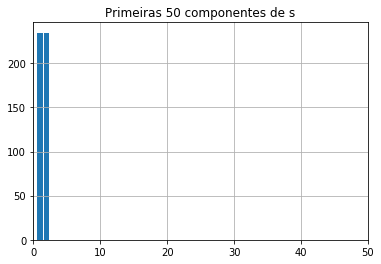

In [594]:
plt.bar(np.arange(1, 1+len(s)), s)
plt.title("Primeiras 50 componentes de s")
plt.xlim([0, 50])
plt.grid()

Como esperado somente os dois primeiros modos tem coeficientes diferentes de 0, isso mostra que todo a função $f$ pode ser representada por apenas dois modos espacias, como esperado teoricamente. Esses modos são:

In [603]:
# duas primeiras colunas de U
mode1 = u[:, 0]
mode2 = u[:, 1]

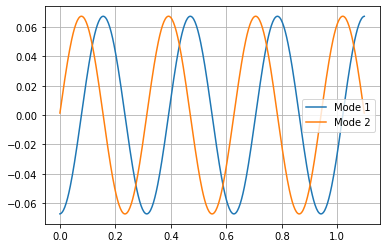

In [604]:
plt.plot(x, mode1)
plt.plot(x, mode2)
plt.legend(["Mode 1", "Mode 2"])
plt.grid()

### Reconstrução com modos ortogonais

Como toda a energia esta contida somente nos dois primeiros modos, podemos representar todo o sinal de forma bem mais enxuta. Utilizando somente os dois modos ortogonais.

Vamos verificar que a função recuperada a partir desses dois modos é igual a função original.


In [626]:
# numero de componentes mantidas
n_reduct = 2

In [627]:
u_reduc = u[:, 0:n_reduct]

In [629]:
s_reduc = np.diag(s)[0:n_reduct, 0:n_reduct]

In [630]:
v_reduc = v[0:n_reduct, :]

In [632]:
f_recoverd = np.dot(np.dot(u_reduc, s_reduc), v_reduc)

Text(0.5, 1.0, 'f(x, t) - Recovery')

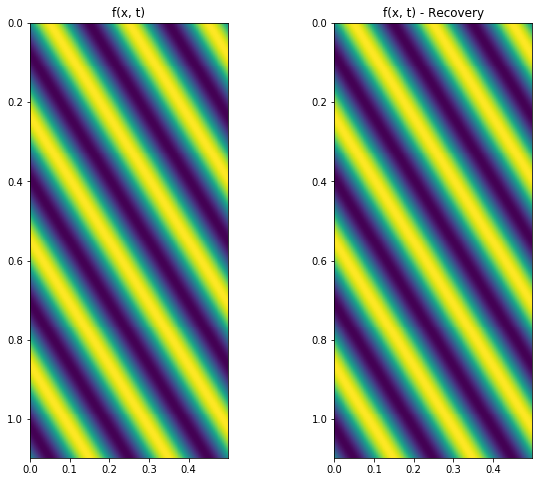

In [636]:
fig, axs = plt.subplots(1, 2, figsize = (10, 8))
axs[0].imshow(f, extent=[min(t), max(t), max(x), min(x)])
axs[0].set_title("f(x, t)")
axs[1].imshow(f_recoverd, extent=[min(t), max(t), max(x), min(x)])
axs[1].set_title("f(x, t) - Recovery")